# Exercício #2

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [66]:
# Sets the number of examples
M = 100

# Reset pseudo random number generator so that the results are reproducible
np.random.seed(42)

# Create target function and its noisy versionx 
x = 6*np.random.rand(M, 1) - 3
y = 2 + x + 0.5*x**2
y_noisy = y + np.random.randn(M,1)
                              
Mtest = 100
x_test = np.linspace(-3, 3, Mtest).reshape(Mtest, 1)
y_test = 2 + 0.5*x_test + np.random.randn(Mtest, 1)

In [67]:
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.7, random_state=42)

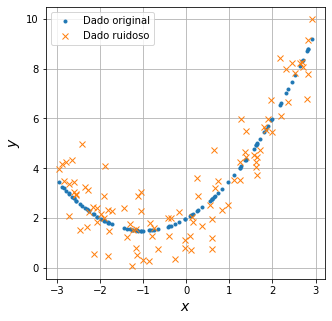

In [68]:
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
# plt.savefig("target_function.png", dpi=600)
plt.show()

In [69]:
# Polynomial order
model_order = 90

In [70]:
# Regularization factor
lambdas = np.linspace(10**-10, 1, 1000)

# Lasso

In [71]:
train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        epoch = i
        model_opt = clone(model)
        lambda_opt = lambdas[i]

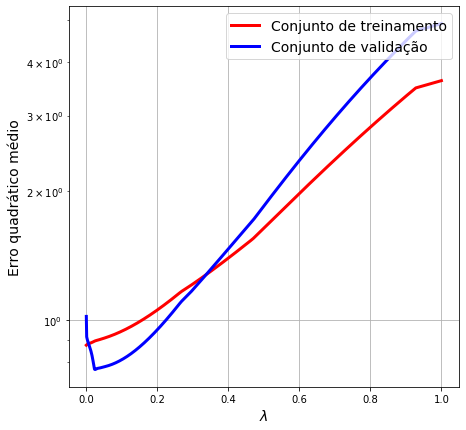

In [63]:
fig = plt.figure(figsize=(7,7))

plt.plot(lambdas, train_errors, "r", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, val_errors, "b", linewidth=3, label="Conjunto de validação")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

In [72]:
print('Época:', epoch)
print('Lambda ótimo:', lambda_opt)
print('Menor erro:', minimum_val_error)

Época: 25
Lambda ótimo: 0.025025025122522526
Menor erro: 0.7682727062847718


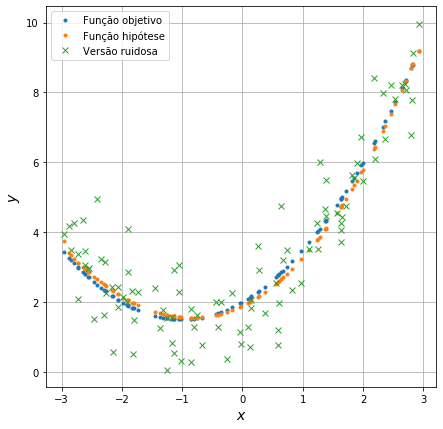

In [77]:
model_opt.fit(x_train, y_train)

fig = plt.figure(figsize=( 7,7))
plt.plot(x, y, '.', label='Função objetivo')
plt.plot(x, model_opt.predict(x), '.', label='Função hipótese')
plt.plot(x, y_noisy, 'x', label='Versão ruidosa')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)
plt.legend()
plt.grid()
# plt.savefig("target_function.png", dpi=600)
plt.show()

In [78]:
print(model_opt.named_steps['reg'].intercept_)
print(model_opt.named_steps['reg'].coef_)

[3.18408431]
[ 0.00000000e+00  1.45443084e+00  1.32226893e+00  1.81617592e-01
  9.36214156e-03 -7.73484231e-03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000

# Ridge

In [27]:
include_bias = True

epoch = None
error_test = []
minimum_val_error = float("inf")
model_opt = None
lambda_opt = None

for i in range(0,len(lambdas)):

    # Instantiate a polynomial with the given degree
    poly_features = PolynomialFeatures(degree=model_order, include_bias = include_bias)
    # Instantiate a scaler that will standardize the features
    std_scaler = StandardScaler()
    # Instantiate a Ridge regressor
    # reg = Ridge(alpha=lambdas[i], solver="cholesky")
    reg = Ridge(alpha=lambdas[i], tol=1)
    # Create a pipeline of actions
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    # Train model
    model.fit(x, y_noisy)
    # Predict
    y_test_regul = model.predict(x_test)
    # Calculates the error
    error_test.append((mean_squared_error(y_test, y_test_regul)))
    # Saves the minimmum error value and lambda
    if error_test[i] < minimum_val_error:
        epoch = i   
        model_opt = clone(model)
        lambda_opt = lambdas[i]
        minimum_val_error = error_test[i]

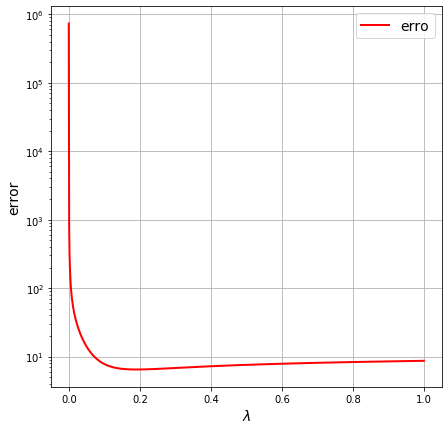

In [28]:
# Plot error
fig = plt.figure(figsize=(7,7))
plt.plot(lambdas, error_test, "r", linewidth=2, label="Erro")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('error', fontsize=14)
plt.grid()
# Save figure
# plt.savefig("ridge_regression_error.png", dpi=600)
plt.show()

In [30]:
print('Época: {}'.format(epoch)) 
print('Lambda ótimo: {}'.format(lambda_opt)) 
print('Menor erro: {}'.format(minimum_val_error)) 

Época: 190
Lambda ótimo: 0.19019019027117118
Menor erro: 6.481712334203014


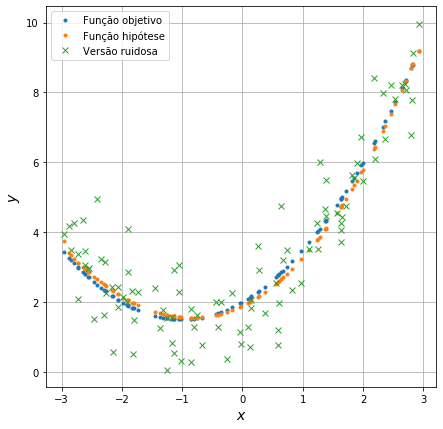

In [80]:
model_opt.fit(x_train, y_train)

fig = plt.figure(figsize=( 7,7))
plt.plot(x, y, '.', label='Função objetivo')
plt.plot(x, model_opt.predict(x), '.', label='Função hipótese')
plt.plot(x, y_noisy, 'x', label='Versão ruidosa')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)
plt.legend()
plt.grid()
# plt.savefig("target_function.png", dpi=600)
plt.show()

In [81]:
print(model_opt.named_steps['reg'].intercept_)
print(model_opt.named_steps['reg'].coef_)

[3.18408431]
[ 0.00000000e+00  1.45443084e+00  1.32226893e+00  1.81617592e-01
  9.36214156e-03 -7.73484231e-03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000

In [ ]:
# Responder letra J